In [145]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from scipy import stats
from scipy.stats import norm, skew

from pandas.api.types import CategoricalDtype

In [146]:
pwd

'C:\\Users\\doloy\\OneDrive\\Documents\\policeproj'

In [147]:
df=pd.read_csv(r'C:\Users\doloy\OneDrive\Documents\policeproj\police_killings.csv', encoding = "ISO-8859-1", engine='python')
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [148]:
df.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [149]:
#Alot of these objects should be ints because they contain unknown, - , NA, 0

#Delete columns not needed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  467 non-null    object 
 1   age                   467 non-null    object 
 2   gender                467 non-null    object 
 3   raceethnicity         467 non-null    object 
 4   month                 467 non-null    object 
 5   day                   467 non-null    int64  
 6   year                  467 non-null    int64  
 7   streetaddress         463 non-null    object 
 8   city                  467 non-null    object 
 9   state                 467 non-null    object 
 10  latitude              467 non-null    float64
 11  longitude             467 non-null    float64
 12  state_fp              467 non-null    int64  
 13  county_fp             467 non-null    int64  
 14  tract_ce              467 non-null    int64  
 15  geo_id                4

In [150]:
#*NEEDS WORK*
#Delete all rows that are "Unkown", "-" and maybe delete or fill the NA and 0
df = df[df.age != "Unknown"]
df = df[df.p_income != "Unknown"]
df = df[df.p_income != "-"]

In [151]:
#Convert objects to int and float
df["age"] = df["age"].astype(str).astype(int)
df["p_income"] = df["p_income"].astype(str).astype(float)

In [152]:
print(df.armed.unique())
print(df.raceethnicity.unique())
print(df.cause.unique())

['No' 'Firearm' 'Non-lethal firearm' 'Other' 'Knife' 'Vehicle' 'Unknown'
 'Disputed']
['Black' 'White' 'Hispanic/Latino' 'Unknown' 'Asian/Pacific Islander'
 'Native American']
['Gunshot' 'Death in custody' 'Taser' 'Struck by vehicle' 'Unknown']


In [153]:
df.nat_bucket.unique()

array([3., 1., 4., 2., 5.])

In [154]:
#Encoding
nominal_features=["gender","raceethnicity","month","streetaddress","state","cause","armed","county_bucket","nat_bucket"]

order_levels = {
    "county_bucket": ['1', '2', '3', '4', '5'],
    "nat_bucket": ['1', '2', '3', '4', '5'],
    "gender": ["Male", "Female"]
    
}

def encode(df):
    for col in nominal_features:
        df[col]=df[col].astype("category")
        
    for col, order_level in order_levels.items():
        df[col] = df[col].astype(CategoricalDtype(order_level, ordered=True))
        
#     mapper = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
#     df["ExterCond"] = df["ExterCond"].replace(mapper)
        
    return df
        
    
df = encode(df) 

In [155]:
print(df.county_bucket.unique())
print(df.nat_bucket.unique())
print(df.gender.unique())

[3, 2, 5, 1, 4, NaN]
Categories (5, object): [1 < 2 < 3 < 4 < 5]
[3, 1, 4, 2, 5]
Categories (5, object): [1 < 2 < 3 < 4 < 5]
[Male, Female]
Categories (2, object): [Male < Female]


In [156]:
def drop_missing_values(df):
    df = df[df.columns[df.isnull().mean()<0.7]]
    df = df.loc[df.isnull().mean(axis=1)<0.7]
    
    return df

def impute(df):
    for col in df.select_dtypes("number"):
#         df[col] = df[col].fillna(0)
        df[col] = df[col].fillna(df[col].median())
    
    for col in df.select_dtypes("category"):
        if "None" not in df[col].cat.categories: df[col].cat.add_categories("None", inplace=True)
        df[col] = df[col].fillna("None")
        
    return df


df = drop_missing_values(df)
df = impute(df)

In [157]:
print(df.county_bucket.unique())
print(df.nat_bucket.unique())
print(df.gender.unique())

[3, 2, 5, 1, 4, None]
Categories (6, object): [1 < 2 < 3 < 4 < 5 < None]
[3, 1, 4, 2, 5]
Categories (5, object): [1 < 2 < 3 < 4 < 5]
[Male, Female]
Categories (2, object): [Male < Female]


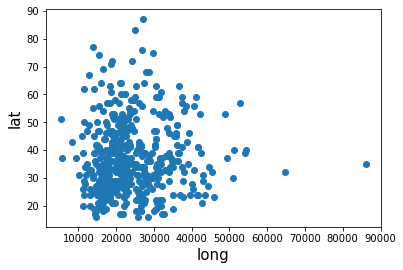

In [158]:
fig, ax = plt.subplots()
ax.scatter(x = df.p_income, y = df.age)
plt.ylabel('lat', fontsize=15)
plt.xlabel('long', fontsize=15)
plt.show()

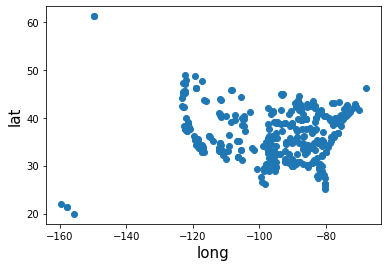

In [159]:
fig, ax = plt.subplots()
ax.scatter(x = df.longitude, y = df.latitude)
plt.ylabel('lat', fontsize=15)
plt.xlabel('long', fontsize=15)
plt.show()

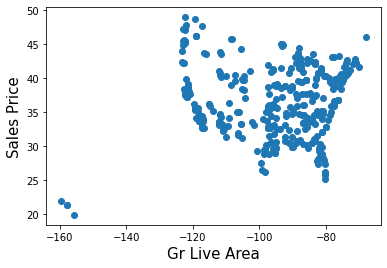

In [160]:
df = df.drop(df[(df.longitude<-130) & (df.latitude>55) & (df.latitude>30)].index)


fig, ax = plt.subplots()
ax.scatter(x = df.longitude, y = df.latitude)
plt.ylabel('Sales Price', fontsize=15)
plt.xlabel('Gr Live Area', fontsize=15)
plt.show()

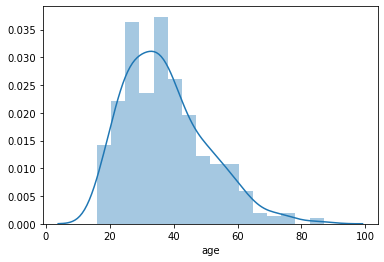

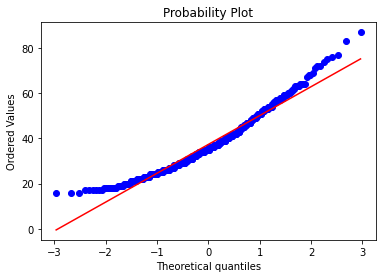

In [161]:
#Log Transformation

sns.distplot(df.age)

fig = plt.figure()
res = stats.probplot(df.age, plot=plt)
plt.show()

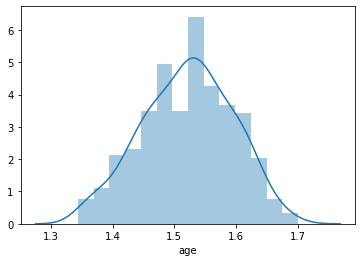

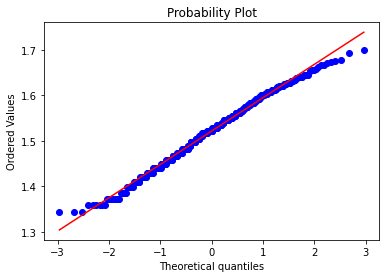

In [163]:
df.age = np.log1p(df.age)

sns.distplot(df.age)

fig = plt.figure()
res = stats.probplot(df.age, plot=plt)
plt.show()